## Inciso a) Armado del dataset y one hot encoding

Primero, definimos nuestro $h=50$. Por otra parte, importamos los datasets de entrenamiento y testeo usando la librería MLDatasets. Es importante mencionar que, dado que usamos el comando *Float32*, **los datos ya vienen normalizados**

In [77]:
using MLDatasets, Images, Plots, Random

# Número de neuronas ocultas. Lo definimos en 50
h = 50

# Importamos los datos
X_train, y_train = MLDatasets.MNIST(Float32, :train)[:]
X_test, y_test = MLDatasets.MNIST(Float32, :test)[:]

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

Definimos ela funcion *one_hot* para transformar la variable target en formato one hot encoding

In [78]:
# Codificamos las etiquetas en formato one-hot
function one_hot(y::Vector{Int})
    Y = zeros(Float32, 10, length(y))
    for (i, yi) in enumerate(y)
        Y[yi + 1, i] = 1.0
    end
    return Y
end

y_train_oh = one_hot(y_train)
y_test_oh  = one_hot(y_test)

10×10000 Matrix{Float32}:
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

Visualizamos que lo importado genere las imagenes.

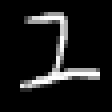

In [79]:
# Visualización opcional
Gray.(X_train[:,:,2])
Gray.(X_train[:,:,3])


## Inciso b)Estructuración de la red neuronal, loss function y back propagation

Primero, aplanamos las imágenes con *reshape* para que esté en un formato adecuado para ser el input de la red.

In [80]:

# Aplanamos las imágenes
X_train_flattened = reshape(X_train, :, size(X_train, 3))  # 784 x N
X_test_flattened = reshape(X_test, :, size(X_test, 3))

# Estructura de la red
struct RedSimple{T<:Real}
    W1::Matrix{T}
    b1::Vector{T}
    W2::Matrix{T}
    b2::Vector{T}
end


Luego, inicializamos las neuronas en valores aleatorios.

In [81]:

Random.seed!(087)
W1 = randn(h, size(X_train_flattened, 1))*0.01
b1 = randn(h)
W2 = randn(10, h)*0.01
b2 = randn(10)

model = RedSimple(W1, b1, W2, b2)

RedSimple{Float64}([-0.0014397178600280068 -8.644733699016194e-5 … -0.008080083690040136 -0.002873937854843336; 0.01799184886106406 0.00031547362555631083 … 0.014651988465635162 0.003531932620339114; … ; -0.003928695073297974 0.006107167438520136 … -0.003505675939475376 0.008060475634650274; -0.005882002447950916 -0.008006819269586242 … 0.00641238911657989 -0.017818763438261505], [0.11089566568835658, 0.5568672388195418, -1.0077577135246356, -1.6132634145776503, -0.04704054955421034, 1.580265900682264, -1.26458001357994, 1.3284104305444036, -1.8784081783270055, 0.5245082608763084  …  3.097741100975767, 0.20600272899412966, 1.622662256293743, 0.8105175982660051, 0.05275524579395179, -1.1524264957371506, -1.3023203805768637, -0.7267318472258388, 1.3229517555020853, -1.118918349597004], [-0.0022572592515777423 0.0015938744266934708 … -0.0005835911873011418 0.0026310931384139376; -0.006477113593316871 0.004046180851765625 … 0.0031052485458842533 0.0018147151801812117; … ; 0.013644645713290

Definimos: 
* nuestra función de activación sigmoide $\sigma$
* la función softmax para llevar el output a probabilidades
* la función *forward*, que, dado un $x$ calcula el output tras aplicarle una red neuronal *model*. La función de vuelve el valor predicho pero tsambien todos los valores intermedios de las capas y activaciones, lo cual será de utilidad más adelante.

In [82]:

# Funciones de activación
σ(x) = 1 ./ (1 .+ exp.(-x))

function softmax(z)
    ez = exp.(z .- maximum(z))
    return ez ./ sum(ez)
end

# Forward pass que también devuelve valores intermedios
function forward(x::Vector{Float32}, model::RedSimple)
    z1 = model.W1 * x .+ model.b1               # h
    a1 = σ.(z1)                                 # h
    z2 = model.W2 * a1 .+ model.b2              # 10
    ŷ = softmax(z2)                            # 10
    return ŷ, z1, a1, z2
end


forward (generic function with 1 method)

Definimos la función de logverosimilitud. Toma un $x$ (input de una red), un $y$ de valores target y una red neurnal *model*. Devuelve de output la función de perdida basada en logverosimilitud

In [83]:

# Log-verosimilitud (entropía cruzada negativa)
function log_likelihood(x::Vector{Float32}, y::Vector{Float32}, model::RedSimple)
    ŷ, _, _, _ = forward(x, model)
    return -sum(y .* log.(ŷ .+ 1e-9))
end

log_likelihood (generic function with 1 method)

Ahora definimos *manual_gradient* que dado vector input x₁, vector target y₁, y red *model*, hace backpropagation para calcular el gradiente

In [84]:
# Backpropagation manual usando los valores intermedios del forward
function manual_gradient(x::Vector{Float32}, y::Vector{Float32}, model::RedSimple)
    ŷ, z1, a1, z2 = forward(x, model)

    # Retropropagación
    δ2 = ŷ - y
    σ′ = a1 .* (1f0 .- a1)              # derivada de sigmoide
    δ1 = (model.W2' * δ2) .* σ′

    ∇W2 = δ2 * a1'
    ∇b2 = δ2
    ∇W1 = δ1 * x'
    ∇b1 = δ1

    return RedSimple(∇W1, ∇b1, ∇W2, ∇b2)
end


manual_gradient (generic function with 1 method)

Calculemoslo en un ejemplo

In [85]:

# Ejemplo: calculamos el gradiente para el primer dato
x₁ = X_train_flattened[:, 1]
y₁ = y_train_oh[:, 1]

grad = manual_gradient(x₁, y₁, model)
grad

RedSimple{Float64}([-0.0 -0.0 … -0.0 -0.0; -0.0 -0.0 … -0.0 -0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-0.003745091006648752, -0.0008741056295553725, -0.0010611296317146533, -0.0012173206646984625, -0.001139719061842752, 0.001344941801884909, 0.0017431678341543503, 4.177082205170961e-5, 0.0012224483165275027, -0.0039511806390759  …  0.00010617766312453407, 0.005046368442999132, 0.0024263589808640076, -0.0018007646679272737, -0.00024203255583078717, 0.002394490962478889, 0.000389121344558461, -0.0010328055957076238, 0.001447382199587367, 0.001217233420671433], [0.01590823112902932 0.018801379744969374 … 0.023203959178920205 0.007004060616137541; 0.008270479698025178 0.009774589532577342 … 0.012063432555544866 0.0036413188028050617; … ; 0.032457899638947955 0.038360851805979576 … 0.047343527520246224 0.014290532661978732; 0.07236511134770193 0.08552578396050466 … 0.10555272148554387 0.03186084123758728], [0.029427902176367895, 0.015299178490121187, 0.10714236802971773, 0.154242010

## Inciso c) Aplicación de descenso del gradiente

Definimos primero una función in place que dado un modelo, un gradiente y una tasa de aprendizaje, actualiza los valores con descenso de gradiente.

In [86]:
function update!(model::RedSimple, grad::RedSimple, η::Float32)
    model.W1 .-= η .* grad.W1
    model.b1 .-= η .* grad.b1
    model.W2 .-= η .* grad.W2
    model.b2 .-= η .* grad.b2
end


update! (generic function with 1 method)

definimos 

*entrenar_descenso_gradiente!(model::RedSimple, X_train, Y_train, X_test, Y_test, η::Float32, n_epochs::Int)*

Entrena el modelo de red neuronal utilizando descenso de gradiente por lotes completo (vanilla gradient descent). 
Calcula el gradiente promedio sobre todo el conjunto de entrenamiento en cada época y actualiza los parámetros del modelo una sola vez por época, minimizando la pérdida de log-verosimilitud (entropía cruzada negativa). Evalúa el desempeño en ambos conjuntos (entrenamiento y prueba) después de cada época.

# Argumentos
- `model::RedSimple`: El modelo de red neuronal a entrenar.
- `X_train`: Matriz de características de entrenamiento (flattened images).
- `Y_train`: Etiquetas one-hot del conjunto de entrenamiento.
- `X_test`: Matriz de características de prueba (flattened images).
- `Y_test`: Etiquetas one-hot del conjunto de prueba.
- `η::Float32`: Tasa de aprendizaje para el descenso de gradiente.
- `n_epochs::Int`: Número de épocas de entrenamiento.

# Retorno
- `historial_train`: Vector con la pérdida promedio en el conjunto de entrenamiento por época.
- `historial_test`: Vector con la pérdida promedio en el conjunto de prueba por época.

# Notas
- La función modifica el modelo in-place (con el operador `!`).
- Imprime el progreso de entrenamiento (pérdida) después de cada época.

In [87]:
function entrenar_descenso_gradiente!(model::RedSimple, 
    X_train, Y_train, X_test, Y_test, η::Float32, 
    n_epochs::Int)
    N_train = size(X_train, 2)  # cantidad de ejemplos de entrenamiento
    N_test = size(X_test, 2)    # cantidad de ejemplos de test
    historial_train = zeros(Float32, n_epochs)
    historial_test = zeros(Float32, n_epochs)

    for epoch in 1:n_epochs
        # Inicializar gradientes acumulados
        ∇W1 = zeros(size(model.W1))
        ∇b1 = zeros(size(model.b1))
        ∇W2 = zeros(size(model.W2))
        ∇b2 = zeros(size(model.b2))

        # Acumular gradientes sobre todo el conjunto de entrenamiento
        loss_total_train = 0f0
        for i in 1:N_train
            xᵢ = X_train[:, i]
            yᵢ = Y_train[:, i]
            grad = manual_gradient(xᵢ, yᵢ, model)

            # Sumar los gradientes
            ∇W1 .+= grad.W1
            ∇b1 .+= grad.b1
            ∇W2 .+= grad.W2
            ∇b2 .+= grad.b2

            # Acumular pérdida
            loss_total_train += log_likelihood(xᵢ, yᵢ, model)
        end

        # Promediar los gradientes (dividir entre el número de ejemplos)
        ∇W1 ./= N_train
        ∇b1 ./= N_train
        ∇W2 ./= N_train
        ∇b2 ./= N_train

        # Actualizar el modelo una sola vez por época
        model.W1 .-= η .* ∇W1
        model.b1 .-= η .* ∇b1
        model.W2 .-= η .* ∇W2
        model.b2 .-= η .* ∇b2

        # Calcular pérdida promedio en entrenamiento
        historial_train[epoch] = loss_total_train / N_train

        # Evaluación en test set (sin actualizar parámetros)
        loss_total_test = 0f0
        for i in 1:N_test
            xᵢ = X_test[:, i]
            yᵢ = Y_test[:, i]
            loss_total_test += log_likelihood(xᵢ, yᵢ, model)
        end
        historial_test[epoch] = loss_total_test / N_test

        println("Época $epoch, pérdida train = $(round(historial_train[epoch], digits=4)), pérdida test = $(round(historial_test[epoch], digits=4))")
    end

    return historial_train, historial_test
end

entrenar_descenso_gradiente! (generic function with 1 method)

Época 1, pérdida train = 2.5474, pérdida test = 2.4926
Época 2, pérdida train = 2.4912, pérdida test = 2.4485
Época 3, pérdida train = 2.4474, pérdida test = 2.4136
Época 4, pérdida train = 2.4127, pérdida test = 2.3859
Época 5, pérdida train = 2.3852, pérdida test = 2.3641
Época 6, pérdida train = 2.3635, pérdida test = 2.3471
Época 7, pérdida train = 2.3467, pérdida test = 2.3341
Época 8, pérdida train = 2.3337, pérdida test = 2.3242
Época 9, pérdida train = 2.3239, pérdida test = 2.3169
Época 10, pérdida train = 2.3167, pérdida test = 2.3115
Época 11, pérdida train = 2.3114, pérdida test = 2.3077
Época 12, pérdida train = 2.3076, pérdida test = 2.305
Época 13, pérdida train = 2.305, pérdida test = 2.3031
Época 14, pérdida train = 2.3031, pérdida test = 2.3017
Época 15, pérdida train = 2.3018, pérdida test = 2.3008
Época 16, pérdida train = 2.3009, pérdida test = 2.3001
Época 17, pérdida train = 2.3002, pérdida test = 2.2995
Época 18, pérdida train = 2.2997, pérdida test = 2.2991
Épo

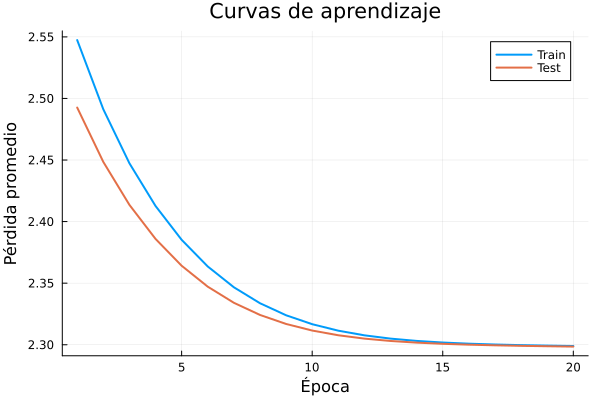

In [88]:
# Entrenar el modelo
η = 0.1f0
n_epochs = 20
modelo = deepcopy(model)  # para mantener el original intacto
historial_train, historial_test = entrenar_descenso_gradiente!(
    modelo, X_train_flattened , y_train_oh, X_test_flattened, y_test_oh, η, n_epochs)

# Graficar ambas curvas
plot(1:n_epochs, [historial_train historial_test], 
    xlabel="Época", ylabel="Pérdida promedio", 
    label=["Train" "Test"], lw=2, title="Curvas de aprendizaje")



Observemos que en cada época de entrenamiento hay una ganancia marginal muy lenta. En principio esto es consistente con estar trabajando con GD sobre todos los datos. Incluso podríamos estar convergiendo a un mínimo local muy lentamente. Para analizar qué está ocurriendo, definamos una función para calcular la accuracy

In [89]:
function calcular_accuracy(model::RedSimple, X::Matrix{Float32}, y::Vector{Int})
    n_correctos = 0
    n_total = size(X, 2)
    
    for i in 1:n_total
        xᵢ = X[:, i]
        ŷ, _, _, _ = forward(xᵢ, model)
        clase_predicha = argmax(ŷ) - 1  # -1 porque Julia usa indexación base 1
        if clase_predicha == y[i]
            n_correctos += 1
        end
    end
    
    return n_correctos / n_total
end



calcular_accuracy (generic function with 1 method)

In [90]:

println("\n=== Entrenando con GD ===")

acc_test =calcular_accuracy(modelo, X_test_flattened, y_test)
print(acc_test)


=== Entrenando con GD ===
0.1135

In [91]:
acc_train = calcular_accuracy(modelo, X_train_flattened, y_train)
print(acc_train)

0.11238333333333334

El accuracy anterior no difiere mucho de lo esperado por el azar (que sería 0.1). Tengamos en cuenta que a pesar de la pequeña diferencia, probablemente sea estadísticamente mejor que la elección aleatoria, dado que estamos calculando el accuracy sobre decenas de miles de observaciones. Sin embargo, no deja de ser bajo. Probaremos menos epochs (10) pero una tasa de aprendizaje particularmente alta: 2

Época 1, pérdida train = 2.5474, pérdida test = 3.0751
Época 2, pérdida train = 3.0809, pérdida test = 3.5131
Época 3, pérdida train = 3.5156, pérdida test = 2.7222
Época 4, pérdida train = 2.7177, pérdida test = 2.3868
Época 5, pérdida train = 2.3893, pérdida test = 2.2682
Época 6, pérdida train = 2.2701, pérdida test = 2.2517
Época 7, pérdida train = 2.2545, pérdida test = 2.2361
Época 8, pérdida train = 2.239, pérdida test = 2.218
Época 9, pérdida train = 2.2214, pérdida test = 2.1975
Época 10, pérdida train = 2.2013, pérdida test = 2.1737


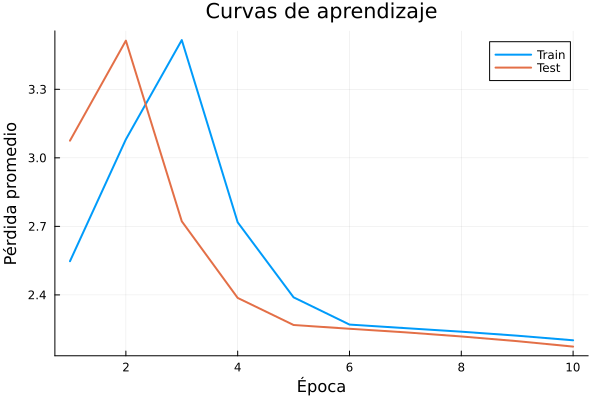

In [92]:
# Entrenar el modelo
η = 2f0
n_epochs = 10
modelo = deepcopy(model)  # para mantener el original intacto
historial_train, historial_test = entrenar_descenso_gradiente!(
    modelo, X_train_flattened , y_train_oh, X_test_flattened, y_test_oh, η, n_epochs)

# Graficar ambas curvas
plot(1:n_epochs, [historial_train historial_test], 
    xlabel="Época", ylabel="Pérdida promedio", 
    label=["Train" "Test"], lw=2, title="Curvas de aprendizaje")

In [93]:

println("\n=== Entrenando con GD ===")

calcular_accuracy(modelo, X_test_flattened, y_test)


=== Entrenando con GD ===


0.2195

In [94]:

calcular_accuracy(modelo, X_train_flattened, y_train)

0.21605

Los resultados mejoran, se muestran considerablemente mejores que la selección al azar, sin embargo distan de lo usualmente obtenido en este tipo de modelos con MNIST. Finalmente,

Ahora desarrollemos la función *entrenar_SGD!* Que también funciona in-place y toma los mismos parámetros que *entrenar_gd* pero usa SGD.

In [95]:
function entrenar_SGD!(
    model::RedSimple, 
    X_train, Y_train, 
    X_test, Y_test, 
    η::Float32, 
    n_epochs::Int
)
    N_train = size(X_train, 2)
    N_test = size(X_test, 2)
    historial_train = zeros(Float32, n_epochs)
    historial_test = zeros(Float32, n_epochs)

    for epoch in 1:n_epochs
        # Barajar los índices de los datos de entrenamiento (shuffle)
        indices = shuffle(1:N_train)
        
        # Entrenamiento con SGD (actualización por cada ejemplo)
        loss_total_train = 0f0
        for i in indices
            xᵢ = X_train[:, i]
            yᵢ = Y_train[:, i]
            
            # Calculamos el gradiente para este ejemplo
            grad = manual_gradient(xᵢ, yᵢ, model)
            
            # Actualizamos los pesos inmediatamente
            update!(model, grad, η)
            
            # Acumulamos la pérdida para monitoreo
            loss_total_train += log_likelihood(xᵢ, yᵢ, model)
        end
        historial_train[epoch] = loss_total_train / N_train
        
        # Evaluación en test set (igual que antes)
        loss_total_test = 0f0
        for i in 1:N_test
            xᵢ = X_test[:, i]
            yᵢ = Y_test[:, i]
            loss_total_test += log_likelihood(xᵢ, yᵢ, model)
        end
        historial_test[epoch] = loss_total_test / N_test
        
        println("Época $epoch, pérdida train = $(round(historial_train[epoch], digits=4)), pérdida test = $(round(historial_test[epoch], digits=4))")
    end

    return historial_train, historial_test
end


entrenar_SGD! (generic function with 1 method)

Entrenamos con SGD, usando una LR $\eta=0.1$ y 10 épocas. Veamos que los resultados son considerablemente mejores y consistentes con lo esperado (que el test loss sea mayor que el train loss)

In [ ]:
η = 0.1f0
#Entrenar con SGD (Stochastic Gradient Descent)
println("\n=== Entrenando con SGD ===")
modelo_sgd = deepcopy(model)  # Otra copia del modelo inicial
hist_train_sgd, hist_test_sgd = entrenar_SGD!(
    modelo_sgd, X_train_flattened, y_train_oh, X_test_flattened, y_test_oh, η, n_epochs
)



=== Entrenando con SGD ===
Época 1, pérdida train = 0.0793, pérdida test = 0.1884
Época 2, pérdida train = 0.0343, pérdida test = 0.1612
Época 3, pérdida train = 0.0266, pérdida test = 0.1213


El gráfico, como lo vemos, resulta consistente con lo esperado:

In [ ]:
# Graficar ambas curvas
plot(1:n_epochs, [hist_train_sgd hist_test_sgd], 
    xlabel="Época", ylabel="Pérdida promedio", 
    label=["Train" "Test"], lw=2, title="Curvas de aprendizaje SGD")

In [ ]:
acc_train_sgd = calcular_accuracy(modelo_sgd, X_train_flattened, y_train)
acc_test_sgd = calcular_accuracy(modelo_sgd, X_test_flattened, y_test)


Obtuvimos una accuracy de 0.97 para train y un 0.96 para test, lo cual es considerablemente superior a lo obtenido en GD.

In [ ]:
using Printf
println("\n=== Comparación Final ===")
println("| Métrica        | GD         | SGD        |")
println("|----------------|------------|------------|")
@printf("| Train Loss     | %.4f      | %.4f      |\n", historial_train[end], hist_train_sgd[end])
@printf("| Test Loss      | %.4f      | %.4f      |\n", historial_test[end], hist_test_sgd[end])
@printf("| Train Accuracy | %.2f%%     | %.2f%%     |\n", acc_train*100, acc_train_sgd*100)
@printf("| Test Accuracy  | %.2f%%     | %.2f%%     |\n", acc_test*100, acc_test_sgd*100)